# Spam Email Classification Dataset

In [10]:
import pandas as pd
df = pd.read_csv("../data/email_text.csv")
df.head()

,label,text
0,1,do you feel the pressure to perform and not ri...
1,0,hi i've just updated from the gulus and i chec...
2,1,mega authenticv i a g r a discount pricec i a ...
3,1,hey billy it was really fun going out the othe...
4,1,system of the home it will have the capabiliti...


### Changing data to be more readable

In [11]:
value_mapping = {1: "Spam", 0: "Ham"}
df["label"] = df["label"].replace(value_mapping)
df = df.rename(columns={"label": "Classification", "text": "Content"})
df.head()

,Classification,Content
0,Spam,do you feel the pressure to perform and not ri...
1,Ham,hi i've just updated from the gulus and i chec...
2,Spam,mega authenticv i a g r a discount pricec i a ...
3,Spam,hey billy it was really fun going out the othe...
4,Spam,system of the home it will have the capabiliti...


### 

### Counting how many e-mails are spam vs ham

In [12]:
pivot_table = df.pivot_table(index='Classification', values='Content', aggfunc='count')
print(pivot_table)

                Content
Classification         
Ham               23745
Spam              29923


### Visualization of data

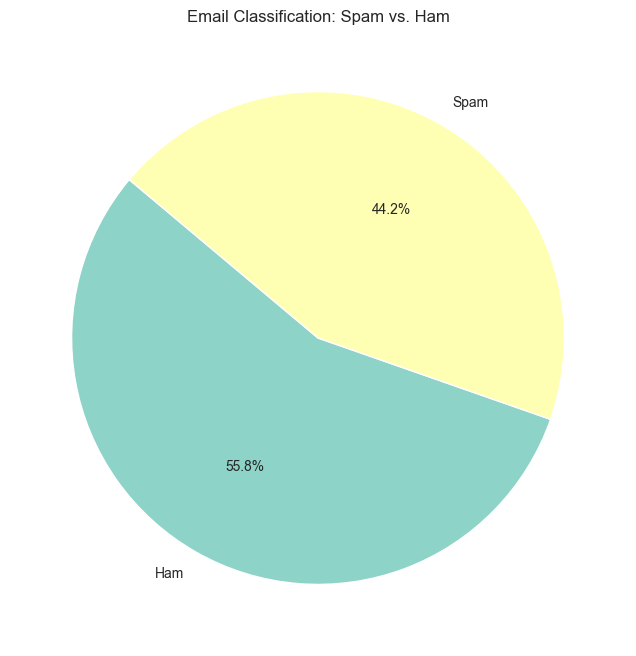

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
total_emails = sum(pivot_table["Content"])
count_spam = sum(pivot_table.loc["Spam"])
count_ham = sum(pivot_table.loc["Ham"])
percentage_spam = (count_spam / total_emails) * 100
percentage_ham = (count_ham / total_emails) * 100
spam_percentage = [percentage_spam, percentage_ham]

sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set3", len(spam_percentage))
plt.pie(
    spam_percentage,
    labels=pivot_table.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors, 
)
plt.title("Email Classification: Spam vs. Ham")

plt.show()